In [33]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

plt.style.use('fivethirtyeight')
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

#    
#    
# Import the dataset and take a peak     

In [2]:
data_path = Path('Full Output.csv')
data = pd.read_csv(data_path)

In [3]:
data.head()

,AGI,BirthYear,CardDisb,Channel,Corporate,DependentCount,EarlyFilerSNS,FederalRefund,Funded,InvoiceID,IRS_Acknowledged,NewClient,PYDebt,ReferaFriend,FedForm_5,FedForm_6,FedForm_8,FedForm_13,FedForm_17,FedForm_19,FedForm_21,FedForm_22,FedForm_25,FedForm_26,FedForm_27,FedForm_28,FedForm_37,FedForm_43,FedForm_55,FedForm_78,FedForm_90,FedForm_91,FedForm_93,FedForm_101,FedForm_102,FedForm_105,FedForm_106,FedForm_107,FedForm_111,FedForm_113,FedForm_116,FedForm_121,FedForm_123,FedForm_124,FedForm_126,FedForm_127,FedForm_129,FedForm_130,FedForm_132,FedForm_133,FedForm_140,FedForm_146,FedForm_148,FedForm_150,FedForm_152,FedForm_153
0,13318.0,1995,1,0,0,1,0,5749.0,1,44637790,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,12730.0,1951,0,0,0,0,0,1379.0,1,44637791,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,15168.0,1984,0,2,0,2,0,6173.0,1,44637796,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,18093.0,1995,0,2,0,1,0,4676.0,1,44637797,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,7069.0,1993,1,0,1,2,0,3487.0,1,44637798,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [4]:
data.shape

(1074044, 56)

1m observations, 40 forms, 15 customer characteristics

In [5]:
print(data.isnull().sum().sort_values(ascending = True))

AGI                 0
FedForm_90          0
FedForm_91          0
FedForm_93          0
FedForm_101         0
FedForm_102         0
FedForm_105         0
FedForm_106         0
FedForm_107         0
FedForm_111         0
FedForm_113         0
FedForm_116         0
FedForm_78          0
FedForm_121         0
FedForm_124         0
FedForm_126         0
FedForm_127         0
FedForm_129         0
FedForm_130         0
FedForm_132         0
FedForm_133         0
FedForm_140         0
FedForm_146         0
FedForm_148         0
FedForm_150         0
FedForm_123         0
FedForm_55          0
FedForm_43          0
FedForm_37          0
BirthYear           0
CardDisb            0
Channel             0
Corporate           0
DependentCount      0
EarlyFilerSNS       0
FederalRefund       0
Funded              0
InvoiceID           0
IRS_Acknowledged    0
NewClient           0
PYDebt              0
ReferaFriend        0
FedForm_5           0
FedForm_6           0
FedForm_8           0
FedForm_13

No null values in the data set

#    
#    
# Look for form correlations with IRS funding

In [6]:
#Split out Federal forms with IRS funding to see which forms correlate with funding

formsdata = ( data.loc[:, 
                        ['Funded',
                        'FedForm_5', 'FedForm_6', 'FedForm_8', 'FedForm_13', 'FedForm_17', 'FedForm_19', 'FedForm_21', 'FedForm_22', 
                        'FedForm_25', 'FedForm_26', 'FedForm_27', 'FedForm_28', 'FedForm_37', 'FedForm_43', 'FedForm_55', 'FedForm_78', 
                        'FedForm_90', 'FedForm_91', 'FedForm_93', 'FedForm_101', 'FedForm_102', 'FedForm_105', 'FedForm_106', 'FedForm_107', 
                        'FedForm_111', 'FedForm_113', 'FedForm_116', 'FedForm_121', 'FedForm_123', 'FedForm_124', 'FedForm_126', 'FedForm_127', 
                        'FedForm_129', 'FedForm_130', 'FedForm_132', 'FedForm_133', 'FedForm_140', 'FedForm_146', 'FedForm_148', 'FedForm_150',
                        'FedForm_152', 'FedForm_153']
                      ])

formsdata.head()


,Funded,FedForm_5,FedForm_6,FedForm_8,FedForm_13,FedForm_17,FedForm_19,FedForm_21,FedForm_22,FedForm_25,FedForm_26,FedForm_27,FedForm_28,FedForm_37,FedForm_43,FedForm_55,FedForm_78,FedForm_90,FedForm_91,FedForm_93,FedForm_101,FedForm_102,FedForm_105,FedForm_106,FedForm_107,FedForm_111,FedForm_113,FedForm_116,FedForm_121,FedForm_123,FedForm_124,FedForm_126,FedForm_127,FedForm_129,FedForm_130,FedForm_132,FedForm_133,FedForm_140,FedForm_146,FedForm_148,FedForm_150,FedForm_152,FedForm_153
0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


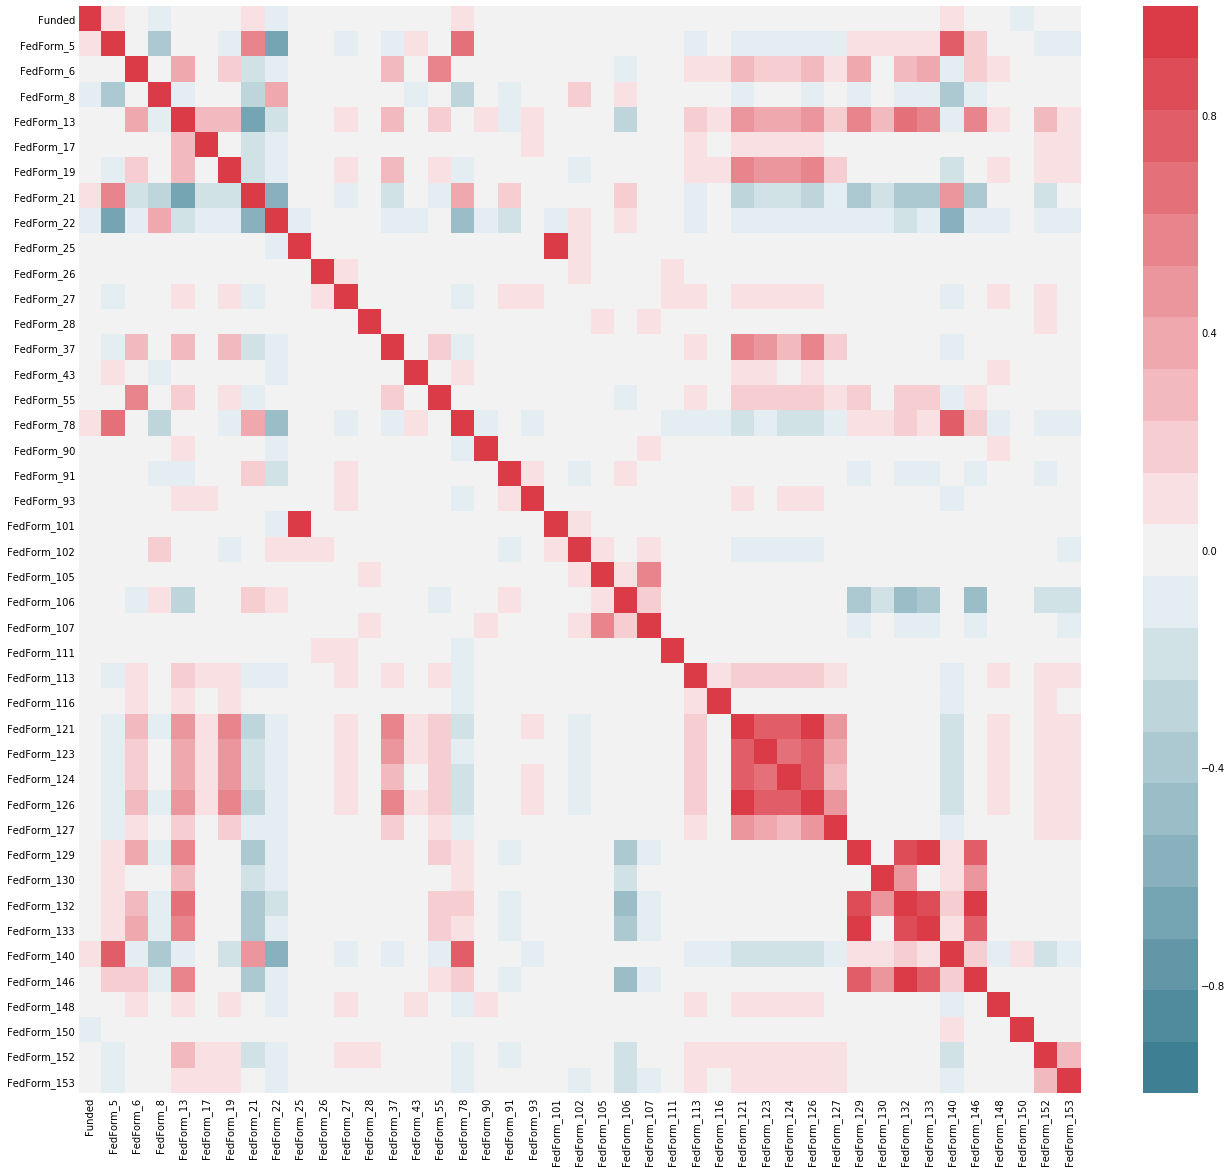

In [7]:
fig, ax = plt.subplots(figsize=(20,20))  
ax = sns.heatmap(formsdata.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21))

In [8]:
formsdata.corr()

,Funded,FedForm_5,FedForm_6,FedForm_8,FedForm_13,FedForm_17,FedForm_19,FedForm_21,FedForm_22,FedForm_25,FedForm_26,FedForm_27,FedForm_28,FedForm_37,FedForm_43,FedForm_55,FedForm_78,FedForm_90,FedForm_91,FedForm_93,FedForm_101,FedForm_102,FedForm_105,FedForm_106,FedForm_107,FedForm_111,FedForm_113,FedForm_116,FedForm_121,FedForm_123,FedForm_124,FedForm_126,FedForm_127,FedForm_129,FedForm_130,FedForm_132,FedForm_133,FedForm_140,FedForm_146,FedForm_148,FedForm_150,FedForm_152,FedForm_153
Funded,1.000000,0.108548,0.002748,-0.133103,0.001706,0.007534,0.022114,0.093041,-0.118970,0.015613,0.007218,-0.002703,0.006725,0.001143,0.024997,0.005579,0.084645,0.025696,0.021787,0.008419,0.015785,-0.028671,-0.018685,0.022673,-0.016034,-0.009958,0.026930,0.009545,0.015626,0.015702,0.026373,0.016875,0.005984,-0.018532,-0.006819,-0.019831,-0.018452,0.091196,-0.020886,0.005915,-0.083653,0.017126,0.017734
FedForm_5,0.108548,1.000000,-0.002095,-0.402278,0.032803,-0.010977,-0.057854,0.534746,-0.707496,-0.020350,0.024307,-0.059032,0.015379,-0.065303,0.110862,-0.011534,0.662938,-0.002700,0.021052,-0.008340,-0.019407,-0.020067,0.002392,-0.016778,0.009393,-0.021101,-0.060755,-0.014405,-0.102927,-0.070831,-0.064421,-0.099028,-0.050533,0.107668,0.067753,0.129407,0.107475,0.777497,0.149232,-0.019733,0.040779,-0.083034,-0.096282
FedForm_6,0.002748,-0.002095,1.000000,-0.030748,0.365032,0.031292,0.173564,-0.231788,-0.083397,0.027533,0.018299,0.028044,0.020780,0.333179,0.028264,0.556376,-0.038469,0.031160,-0.017815,0.016220,0.026962,-0.008408,0.007997,-0.106114,0.005943,-0.003557,0.069456,0.055458,0.282934,0.229675,0.185904,0.276207,0.126704,0.389928,-0.001830,0.330271,0.387670,-0.054566,0.224230,0.049092,-0.011924,0.039326,0.016966
FedForm_8,-0.133103,-0.402278,-0.030748,1.000000,-0.088719,-0.021878,-0.037592,-0.261099,0.420233,0.021579,-0.015161,-0.026680,-0.005293,-0.035426,-0.048572,-0.020678,-0.283182,-0.017494,-0.067900,-0.039723,0.021841,0.165043,0.021509,0.053230,0.028357,-0.042536,-0.027758,-0.021179,-0.056994,-0.044772,-0.046759,-0.056203,-0.021086,-0.048298,-0.028718,-0.056684,-0.048178,-0.335994,-0.063091,-0.027451,-0.006660,-0.039261,-0.043319
FedForm_13,0.001706,0.032803,0.365032,-0.088719,1.000000,0.250935,0.303863,-0.634840,-0.228639,0.021128,0.043513,0.062089,0.037880,0.276315,0.030425,0.209350,-0.029890,0.047650,-0.058663,0.070385,0.020178,-0.028635,0.012421,-0.308735,0.000434,-0.015633,0.154783,0.056218,0.464415,0.350503,0.372631,0.455000,0.208816,0.547412,0.305299,0.628897,0.546366,-0.053151,0.578288,0.072463,-0.025191,0.329558,0.057305
FedForm_17,0.007534,-0.010977,0.031292,-0.021878,0.250935,1.000000,0.040881,-0.154712,-0.063158,0.008940,0.018231,0.023668,0.021721,0.030629,0.008798,0.023633,-0.044977,0.011650,0.000930,0.083830,0.008469,-0.024038,0.005017,-0.025954,0.007186,0.000117,0.047847,0.027716,0.077589,0.056278,0.058649,0.075957,0.032682,0.009290,0.002312,0.007565,0.009250,-0.046371,-0.000385,0.018792,-0.006462,0.054761,0.047626
FedForm_19,0.022114,-0.057854,0.173564,-0.037592,0.303863,0.040881,1.000000,-0.192905,-0.069475,-0.000652,0.020646,0.058066,0.018784,0.316368,0.040953,0.141379,-0.126842,0.032642,-0.023673,0.034871,-0.002043,-0.050311,-0.007651,0.014443,0.001008,-0.009787,0.137243,0.064468,0.546736,0.482795,0.509832,0.558140,0.190413,0.019222,-0.011263,0.009035,0.019139,-0.154181,-0.017340,0.065629,-0.014023,0.067553,0.053696
FedForm_21,0.093041,0.534746,-0.231788,-0.261099,-0.634840,-0.154712,-0.192905,1.000000,-0.607018,0.028983,-0.002474,-0.048615,-0.014198,-0.175356,0.038505,-0.133334,0.396655,0.031987,0.168265,-0.032667,0.031109,-0.040602,-0.024483,0.175421,-0.016987,-0.006408,-0.081587,-0.032535,-0.294825,-0.222514,-0.236561,-0.288852,-0.132565,-0.347519,-0.193816,-0.399249,-0.346855,0.483598,-0.367119,-0.008581,0.037297,-0.166300,0.013169
FedForm_22,-0.118970,-0.707496,-0.083397,0.420233,-0.228639,-0.063158,-0.069475,-0.607018,1.000000,-0.058248,-0.041635,-0.002605,-0.021069,-0.063251,-0.079807,-0.047324,-0.469026,-0.0

Forms 5, 21, and 140 show positive correlations of .11, .09, and .09 respectively.    
Forms 150, 22, and 8 show negative correlations of -.08, -.11, and -.13 respectively.    
These rates are underwhelming, but the rest of the forms were below .03.

#    
#    
# Look for client correlations with IRS funding

In [9]:
#Split out the client info with IRS funding to see which forms correlate with funding

clientdata = ( data.loc[:, 
                        ['AGI', 'BirthYear', 'CardDisb', 'Channel', 'Corporate', 'DependentCount', 
                         'EarlyFilerSNS', 'FederalRefund', 'Funded', 'IRS_Acknowledged',
                        'NewClient', 'PYDebt', 'ReferaFriend',
                        ]
                      ])

clientdata.head()

,AGI,BirthYear,CardDisb,Channel,Corporate,DependentCount,EarlyFilerSNS,FederalRefund,Funded,InvoiceID,IRS_Acknowledged,NewClient,PYDebt,ReferaFriend
0,13318.0,1995,1,0,0,1,0,5749.0,1,44637790,1,1,0,0
1,12730.0,1951,0,0,0,0,0,1379.0,1,44637791,1,0,0,0
2,15168.0,1984,0,2,0,2,0,6173.0,1,44637796,1,0,0,0
3,18093.0,1995,0,2,0,1,0,4676.0,1,44637797,1,1,0,0
4,7069.0,1993,1,0,1,2,0,3487.0,1,44637798,1,0,0,0


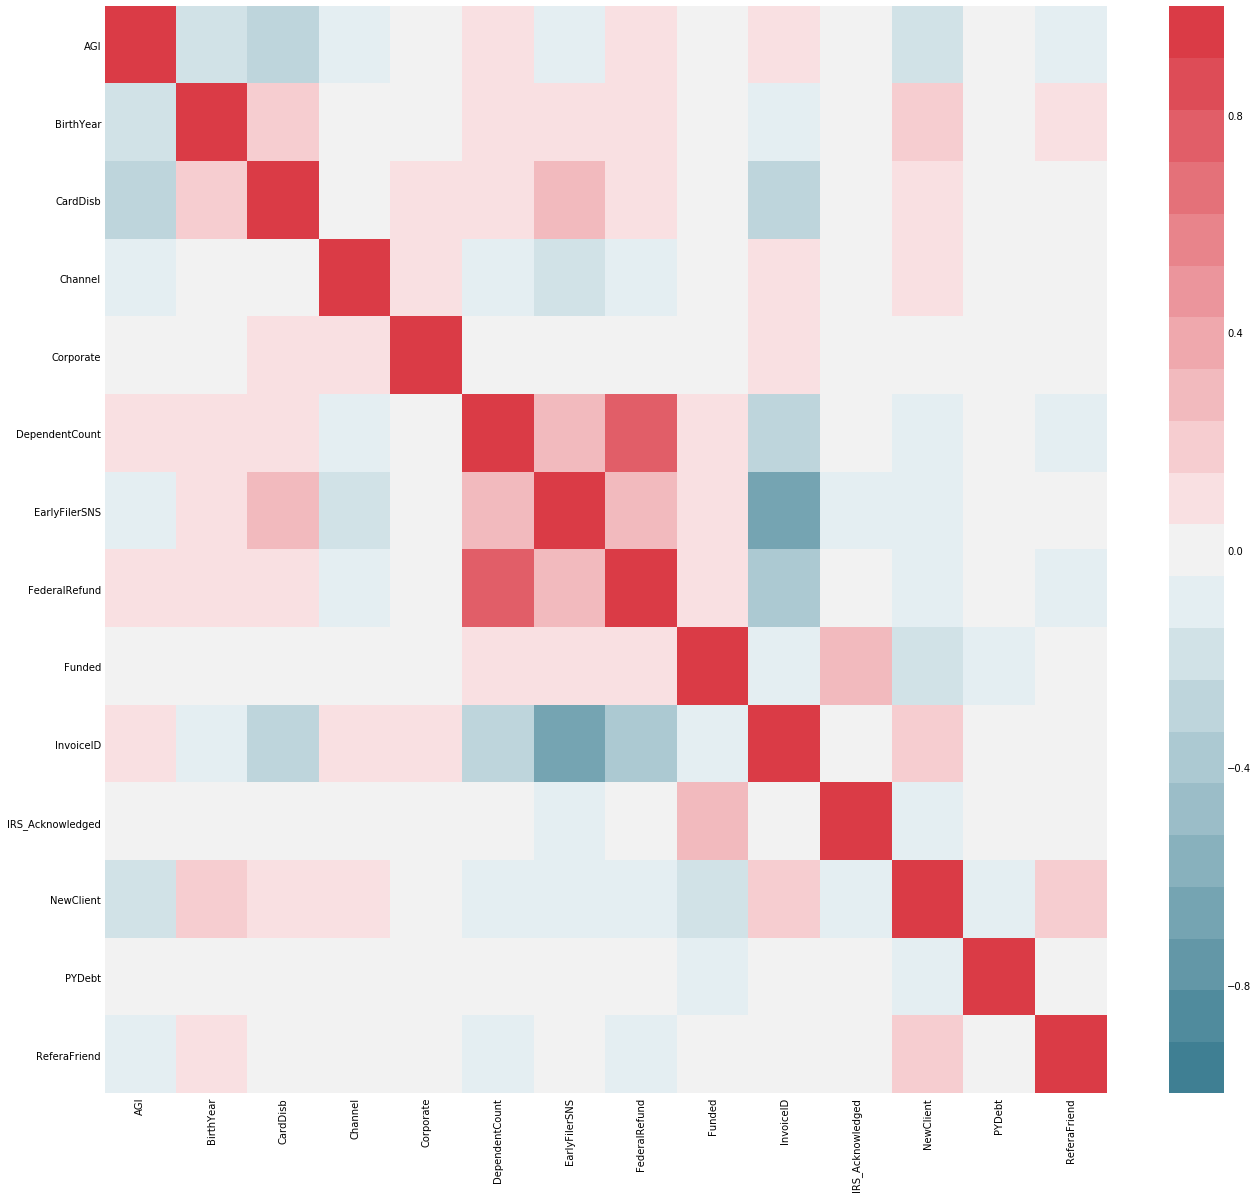

In [10]:
fig, ax = plt.subplots(figsize=(20,20))  
ax = sns.heatmap(clientdata.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21))

In [11]:
clientdata.corr()

,AGI,BirthYear,CardDisb,Channel,Corporate,DependentCount,EarlyFilerSNS,FederalRefund,Funded,InvoiceID,IRS_Acknowledged,NewClient,PYDebt,ReferaFriend
AGI,1.000000,-2.240942e-01,-0.251212,-0.054490,-1.853668e-03,0.051853,-0.100269,0.054715,0.046157,0.124042,0.037698,-0.173818,0.005543,-0.058348
BirthYear,-0.224094,1.000000e+00,0.167814,0.021302,-6.401925e-07,0.099237,0.060146,0.113140,-0.000371,-0.094800,-0.022769,0.170058,-0.020824,0.077756
CardDisb,-0.251212,1.678143e-01,1.000000,0.014606,7.073572e-02,0.096556,0.278107,0.074045,-0.041282,-0.294265,-0.027614,0.065229,-0.003373,0.027585
Channel,-0.054490,2.130163e-02,0.014606,1.000000,1.263213e-01,-0.109980,-0.150929,-0.106182,-0.024025,0.126369,0.021876,0.141275,-0.004533,0.011519
Corporate,-0.001854,-6.401925e-07,0.070736,0.126321,1.000000e+00,-0.016646,-0.033582,-0.016036,-0.007366,0.049875,0.024517,0.037843,-0.004525,0.012907
DependentCount,0.051853,9.923718e-02,0.096556,-0.109980,-1.664577e-02,1.000000,0.268606,0.733525,0.101986,-0.327033,-0.025666,-0.127703,-0.020716,-0.052987
EarlyFilerSNS,-0.100269,6.014626e-02,0.278107,-0.150929,-3.358201e-02,0.268606,1.000000,0.309318,0.051061,-0.622241,-0.069832,-0.117584,-0.034330,-0.044595
FederalRefund,0.054715,1.131404e-01,0.074045,-0.106182,-1.603630e-02,0.733525,0.309318,1.000000,0.142204,-0.369591,-0.009062,-0.131259,-0.025472,-0.049813
Funded,0.046157,-3.710309e-04,-0.041282,-0.024025,-7.365686e-03,0.101986,0.051061,0.142204,1.000000,-0.141457,0.283374,-0.159659,-0.119836,-0.023686
InvoiceID,0.124042,-9.479963e-02,-0.294265,0.126369,4.987525e-02,-0.327033,-0.622241,-0.369591,-0.141457,1.000000,0.011176,0.154741,0.046215,0.032308


IRS acknowledgment, expected Federal refund, dependent count, early filing, and AGI are all
positively correlated at .28, .14, .10, .05, and .05 respectively.

Card disbursements, prior year debt, and new clients are all negatively correlated, at
-.04, -.12, and -.16 respectively.

These rates are underwhelming, and the rest of the forms were below .03.
IRS acknowledgment makes sense, since if the IRS does not acknowledge the return funding is a lot less likely.
Also logical that new clients are less likely to fund, since these tend to be riskier (newer to the company).
Prior year debt clients also makes sense, since they probably owe money from previous refunds not funding (feedback loop).


#    
#    
# Keep variables with only strong correlations

In [12]:
gooddata = ( data.loc[:, 
                        ['Funded',
                         'IRS_Acknowledged', 'FederalRefund', 'DependentCount', 
                         'EarlyFilerSNS', 'AGI', 'CardDisb', 'PYDebt', 'NewClient',
                         'FedForm_5', 'FedForm_21', 'FedForm_140', 'FedForm_150', 'FedForm_22', 'FedForm_8',
                        ]
                      ])

gooddata.head()

,Funded,IRS_Acknowledged,FederalRefund,DependentCount,EarlyFilerSNS,AGI,CardDisb,PYDebt,NewClient,FedForm_5,FedForm_21,FedForm_140,FedForm_150,FedForm_22,FedForm_8
0,1,1,5749.0,1,0,13318.0,1,0,1,1,1,1,0,0,0
1,1,1,1379.0,0,0,12730.0,0,0,0,0,1,0,0,0,0
2,1,1,6173.0,2,0,15168.0,0,0,0,1,1,1,0,0,0
3,1,1,4676.0,1,0,18093.0,0,0,1,1,1,1,0,0,0
4,1,1,3487.0,2,0,7069.0,1,0,0,1,1,1,0,0,0


In [13]:
gooddata.corr()

,Funded,IRS_Acknowledged,FederalRefund,DependentCount,EarlyFilerSNS,AGI,CardDisb,PYDebt,NewClient,FedForm_5,FedForm_21,FedForm_140,FedForm_150,FedForm_22,FedForm_8
Funded,1.000000,0.283374,0.142204,0.101986,0.051061,0.046157,-0.041282,-0.119836,-0.159659,0.108548,0.093041,0.091196,-0.083653,-0.118970,-0.133103
IRS_Acknowledged,0.283374,1.000000,-0.009062,-0.025666,-0.069832,0.037698,-0.027614,-0.005017,-0.067072,-0.037700,-0.023400,-0.043367,-0.188730,0.018248,-0.002356
FederalRefund,0.142204,-0.009062,1.000000,0.733525,0.309318,0.054715,0.074045,-0.025472,-0.131259,0.650139,0.422257,0.652417,0.034171,-0.509849,-0.313914
DependentCount,0.101986,-0.025666,0.733525,1.000000,0.268606,0.051853,0.096556,-0.020716,-0.127703,0.755602,0.387869,0.613588,0.037448,-0.534585,-0.311767
EarlyFilerSNS,0.051061,-0.069832,0.309318,0.268606,1.000000,-0.100269,0.278107,-0.034330,-0.117584,0.264175,0.238839,0.312948,0.179048,-0.174088,-0.104010
AGI,0.046157,0.037698,0.054715,0.051853,-0.100269,1.000000,-0.251212,0.005543,-0.173818,0.003548,-0.102852,-0.335858,-0.028205,-0.124295,-0.227324
CardDisb,-0.041282,-0.027614,0.074045,0.096556,0.278107,-0.251212,1.000000,-0.003373,0.065229,0.118525,0.083241,0.207504,0.061791,0.003563,0.045525
PYDebt,-0.119836,-0.005017,-0.025472,-0.020716,-0.034330,0.005543,-0.003373,1.000000,-0.053819,-0.019826,-0.015785,-0.021503,-0.005820,0.018949,0.016863
NewClient,-0.159659,-0.067072,-0.131259,-0.127703,-0.117584,-0.173818,0.065229,-0.053819,1.000000,-0.112137,-0.060996,-0.050513,-0.000565,0.145850,0.129104
FedForm_5,0.108548,-0.037700,0.650139,0.755602,0.264175,0.003548,0.118525,-0.019826,-0.112137,1.000000,0.534746,0.777497,0.040779,-0.707496,-0.402278


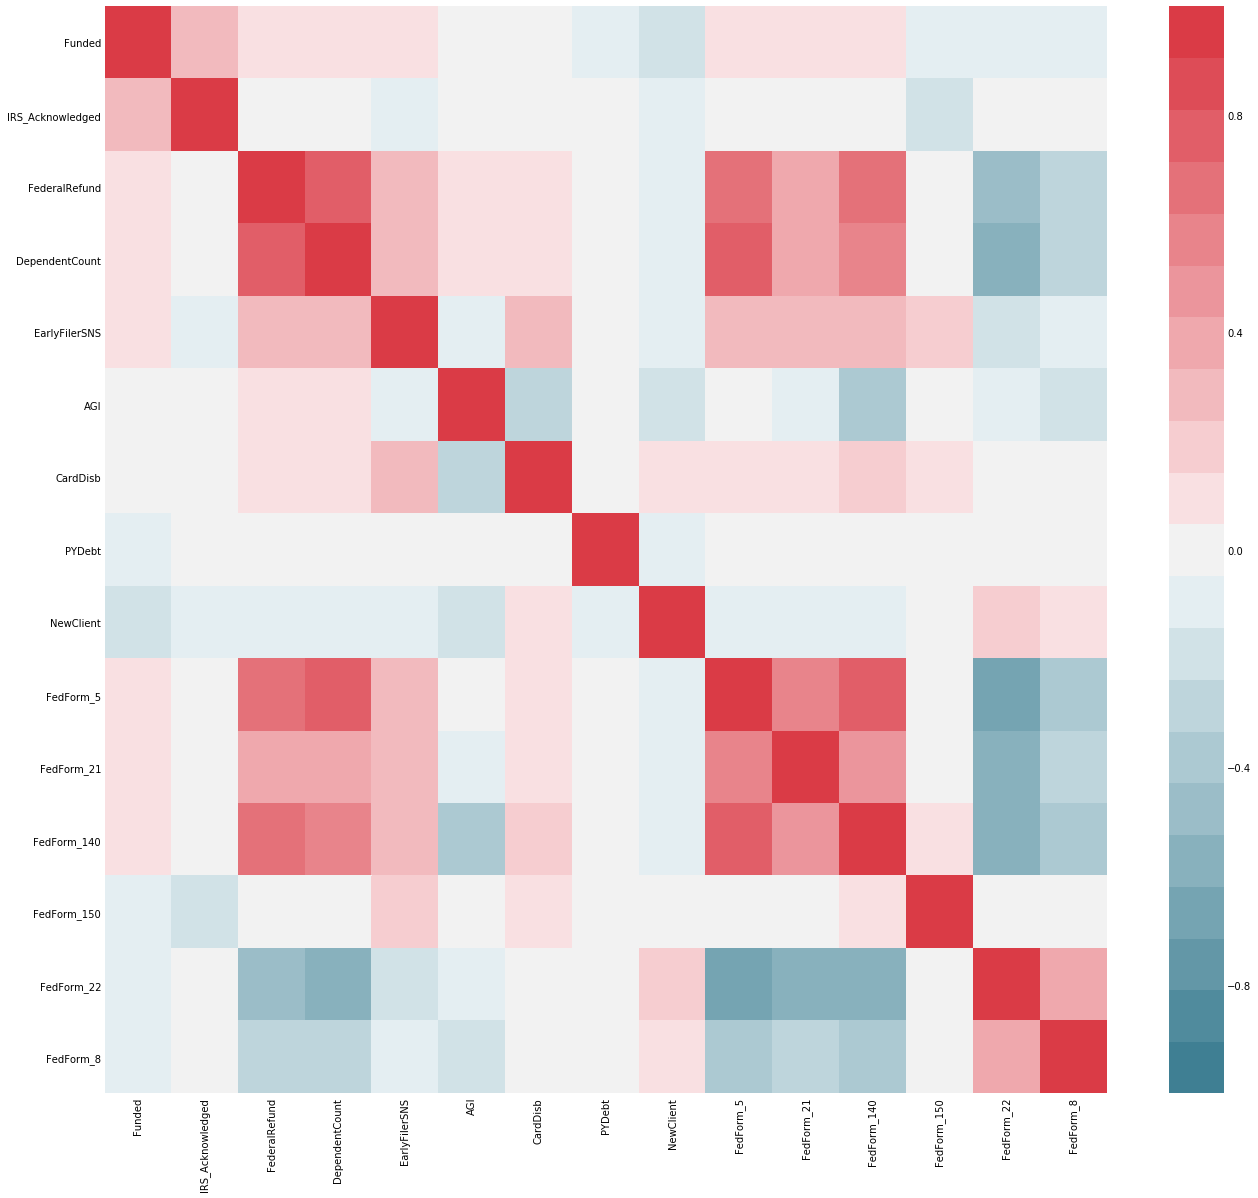

In [14]:
fig, ax = plt.subplots(figsize=(20,20))  
ax = sns.heatmap(gooddata.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21))

Do see some variables correlate strongly with others, see table below.    
Unfortunately, these are the same variables which have high correlations to funded.    
May need to remove some variables to see where RMSE maximizes.

In [15]:
highcorrdata = ( data.loc[:, 
                        ['Funded','FederalRefund','DependentCount','FedForm_5','FedForm_21','FedForm_140']])

highcorrdata.corr()

,Funded,FederalRefund,DependentCount,FedForm_5,FedForm_21,FedForm_140
Funded,1.000000,0.142204,0.101986,0.108548,0.093041,0.091196
FederalRefund,0.142204,1.000000,0.733525,0.650139,0.422257,0.652417
DependentCount,0.101986,0.733525,1.000000,0.755602,0.387869,0.613588
FedForm_5,0.108548,0.650139,0.755602,1.000000,0.534746,0.777497
FedForm_21,0.093041,0.422257,0.387869,0.534746,1.000000,0.483598
FedForm_140,0.091196,0.652417,0.613588,0.777497,0.483598,1.000000


#    
#    
# Create decision tree

In [16]:
feature_cols = [
                             'IRS_Acknowledged', 'FederalRefund', 'DependentCount', 
                         'EarlyFilerSNS', 'AGI', 'CardDisb', 'PYDebt', 'NewClient',
                         'FedForm_5', 'FedForm_21', 'FedForm_140', 'FedForm_150', 'FedForm_22', 'FedForm_8',
                ]

x = gooddata.loc[:,feature_cols]
y = gooddata.loc[:,'Funded']

x_train, x_test, y_train, y_test = train_test_split(x,y)

tree = DecisionTreeClassifier(max_depth=5, random_state=1)
tree.fit(x_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [17]:
pd.DataFrame({'feature': feature_cols, 'importance': tree.feature_importances_}).sort_values(by='importance')

,feature,importance
8,FedForm_5,0.000000
10,FedForm_140,0.000000
2,DependentCount,0.000097
5,CardDisb,0.000511
4,AGI,0.000809
12,FedForm_22,0.002103
9,FedForm_21,0.004395
11,FedForm_150,0.005904
13,FedForm_8,0.030823
3,EarlyFilerSNS,0.066935


DependentCount, Form 5, and Form 140 had literally zero importance.    
Removing from the classifier.

In [18]:
feature_cols = [
                             'IRS_Acknowledged', 'FederalRefund', 
                         'EarlyFilerSNS', 'AGI', 'CardDisb', 'PYDebt', 'NewClient',
                         'FedForm_21', 'FedForm_150', 'FedForm_22', 'FedForm_8',
                ]

x = gooddata.loc[:,feature_cols]
y = gooddata.loc[:,'Funded']

x_train, x_test, y_train, y_test = train_test_split(x,y)

tree = DecisionTreeClassifier(max_depth=5, random_state=1)
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [19]:
pd.DataFrame({'feature': feature_cols, 'importance': tree.feature_importances_}).sort_values(by='importance')

,feature,importance
4,CardDisb,0.000481
3,AGI,0.000907
9,FedForm_22,0.002529
7,FedForm_21,0.003590
8,FedForm_150,0.006009
10,FedForm_8,0.031656
2,EarlyFilerSNS,0.066989
5,PYDebt,0.096893
6,NewClient,0.122926
1,FederalRefund,0.174902


In [20]:
highcorrdata = ( data.loc[:, 
                        ['Funded','FederalRefund','FedForm_21']])

highcorrdata.corr()

,Funded,FederalRefund,FedForm_21
Funded,1.000000,0.142204,0.093041
FederalRefund,0.142204,1.000000,0.422257
FedForm_21,0.093041,0.422257,1.000000


Removing those weak variables helped with the correlation issue discussed earlier.   
Now, the only correlation is between Federal Refund and form 21, which is lower at .42.   
The variables probably had little explanatory power because they were simply correlated with the variable that did have explanatory power.

#    
#    
# Tuning classification by adjusting count of leaves

In [21]:
y_pred = tree.predict(x_test)

In [22]:
tree.score(x_test,y_test)

0.9285876556267714

Model predicted funding correctly 93% of the time

In [23]:
data.loc[:,'Funded'].mean()
#Average funding rate is 92.15% / 7.85%

0.9215320787602742

92% of returns actually funded, so randomly picking 92% of returns would have yielded worse results than the 93%

In [24]:
prediction_scores = []

for depth in range ( 1, 31 ):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=1)
    tree.fit(x_train,y_train)
    y_pred = tree.predict(x_test)
    scorevalue = tree.score(x_test,y_test)
    
    prediction_scores.append([depth,scorevalue])
    
prediction_scores

[[1, 0.9263344890898324],
 [2, 0.9271091314694743],
 [3, 0.9277459768873528],
 [4, 0.928312061703245],
 [5, 0.9285876556267714],
 [6, 0.9286695889553873],
 [7, 0.9286174495644499],
 [8, 0.9285653101735124],
 [9, 0.9284461344227983],
 [10, 0.9283232344298744],
 [11, 0.9280103980842498],
 [12, 0.9273996223618399],
 [13, 0.9269303678434031],
 [14, 0.9263195921209931],
 [15, 0.9254779133815747],
 [16, 0.9243010528432727],
 [17, 0.9231539862426493],
 [18, 0.9218058105626957],
 [19, 0.9201038318728096],
 [20, 0.9182901259166291],
 [21, 0.9163721411785737],
 [22, 0.9140370413130189],
 [23, 0.9121190565749634],
 [24, 0.9098733385224441],
 [25, 0.9077058295563311],
 [26, 0.9052180357601737],
 [27, 0.9028345207458912],
 [28, 0.9008830178279474],
 [29, 0.8989538603632626],
 [30, 0.8966075877710783]]

Text(0.5,1,'Decision Tree Accuracy Score by Branch Number')

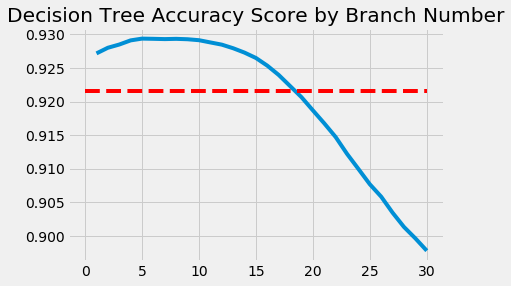

In [51]:
plt.plot(  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
            [0.927157547,0.927995501,0.928475928,0.929094153,0.92935485,0.929325056,0.929284089,0.929321331,
            0.929261743,0.929120222,0.928788765,0.928461031,0.927924741,0.927272998,0.92647601,0.925332668,
            0.923950974,0.922301135,0.920647571,0.91868862,0.916755738,0.914722302,0.912215887,0.909970169,
            0.907698381,0.905847433,0.903467642,0.901344824,0.899650294,0.897817966] 
        )

plt.plot([0, 30], [.9215, .9215], 'r--')
plt.title('Decision Tree Accuracy Score by Branch Number')

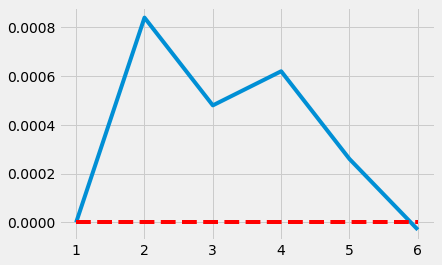

In [52]:
plt.plot(  [1,2,3,4,5,6],
             [ 0,0.00084,0.00048,0.00062,0.00026,-0.00003])

plt.plot([1, 6], [.0, .0], 'r--')

Achieve max prediction level at the 5 depth mark

#    
#    
# Generate graphical decision tree

In [39]:
tree = DecisionTreeClassifier(max_depth=3, random_state=1)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)

tree.score(x_test,y_test)

0.9277459768873528

In [40]:
export_graphviz(tree, out_file='tree.dot', feature_names=feature_cols)

For some reason I'm not able to get the PNG conversion working    
Found this cool website that plots the word file    
http://webgraphviz.com/
    

#    
#    
# Set up some graphics for presentation

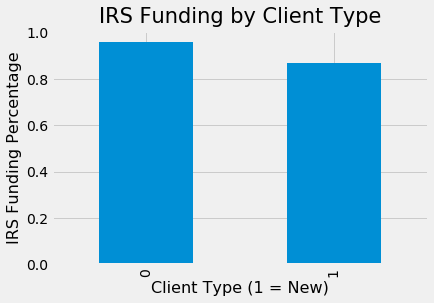

In [41]:
fundedclientnew = data.loc[:, ['Funded','NewClient']]
ax = fundedclientnew.groupby('NewClient').mean().plot(kind='bar')
ax.set_title('IRS Funding by Client Type', fontsize=21, y=1.01)
ax.set_ylabel('IRS Funding Percentage', fontsize=16);
ax.set_xlabel('Client Type (1 = New)', fontsize=16);
ax.get_legend().remove()

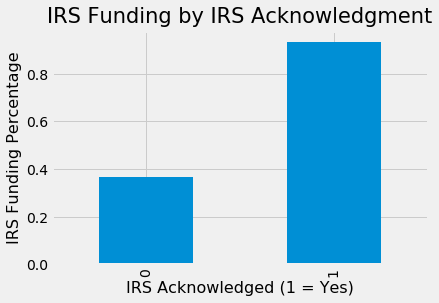

In [42]:
irsack = data.loc[:, ['Funded','IRS_Acknowledged']]
ax = irsack.groupby('IRS_Acknowledged').mean().plot(kind='bar')
ax.set_title('IRS Funding by IRS Acknowledgment', fontsize=21, y=1.01)
ax.set_ylabel('IRS Funding Percentage', fontsize=16);
ax.set_xlabel('IRS Acknowledged (1 = Yes)', fontsize=16);
ax.get_legend().remove()

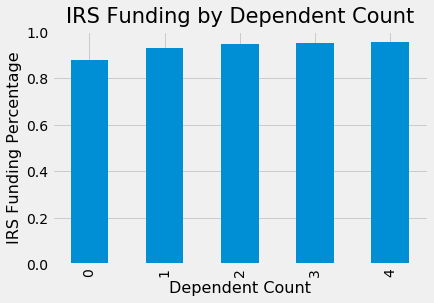

In [43]:
DependentCount = data.loc[:, ['Funded','DependentCount']]
ax = DependentCount.groupby('DependentCount').mean().plot(kind='bar')
ax.set_title('IRS Funding by Dependent Count', fontsize=21, y=1.01)
ax.set_ylabel('IRS Funding Percentage', fontsize=16);
ax.set_xlabel('Dependent Count', fontsize=16);
ax.get_legend().remove()

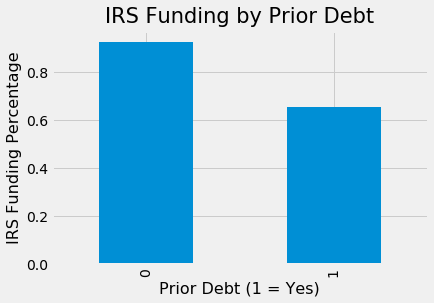

In [44]:
PYDebt = data.loc[:, ['Funded','PYDebt']]
ax = PYDebt.groupby('PYDebt').mean().plot(kind='bar')
ax.set_title('IRS Funding by Prior Debt', fontsize=21, y=1.01)
ax.set_ylabel('IRS Funding Percentage', fontsize=16);
ax.set_xlabel('Prior Debt (1 = Yes)', fontsize=16);
ax.get_legend().remove()

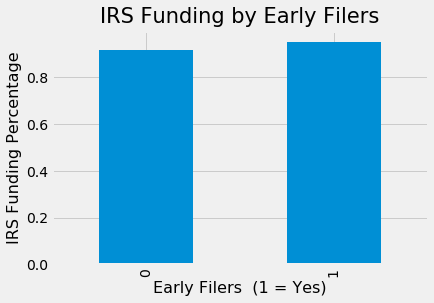

In [45]:
EarlyFilerSNS = data.loc[:, ['Funded','EarlyFilerSNS']]
ax = EarlyFilerSNS.groupby('EarlyFilerSNS').mean().plot(kind='bar')
ax.set_title('IRS Funding by Early Filers', fontsize=21, y=1.01)
ax.set_ylabel('IRS Funding Percentage', fontsize=16);
ax.set_xlabel('Early Filers  (1 = Yes)', fontsize=16);
ax.get_legend().remove()

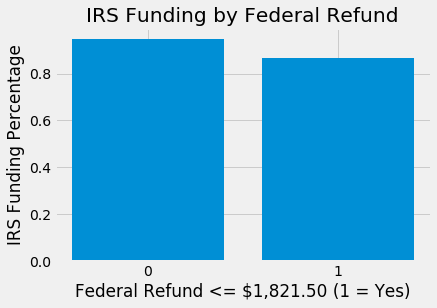

In [46]:
fedrefundvalues = [ data.loc[ data.loc[:,'FederalRefund']>1821.5, 'Funded'].mean(),
                    data.loc[ data.loc[:,'FederalRefund']<=1821.5, 'Funded'].mean()
                     ]

left = [1, 2] 
tick_label = ['0', '1'] 
  
# plotting a bar chart 
plt.bar(left, fedrefundvalues, tick_label = tick_label) 
plt.xlabel('Federal Refund <= $1,821.50 (1 = Yes)') 
plt.ylabel('IRS Funding Percentage') 
plt.title('IRS Funding by Federal Refund') 
plt.show() 

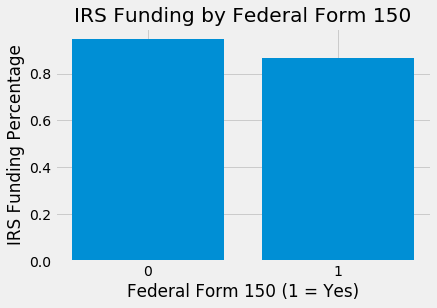

In [47]:
fedform150 = [ data.loc[ data.loc[:,'FedForm_150'] ==0, 'Funded'].mean(),
                    data.loc[ data.loc[:,'FedForm_150'] ==1, 'Funded'].mean()
                     ]

left = [1, 2] 
tick_label = ['0', '1'] 
  
# plotting a bar chart 
plt.bar(left, fedrefundvalues, tick_label = tick_label) 
plt.xlabel('Federal Form 150 (1 = Yes)') 
plt.ylabel('IRS Funding Percentage') 
plt.title('IRS Funding by Federal Form 150') 
plt.show() 

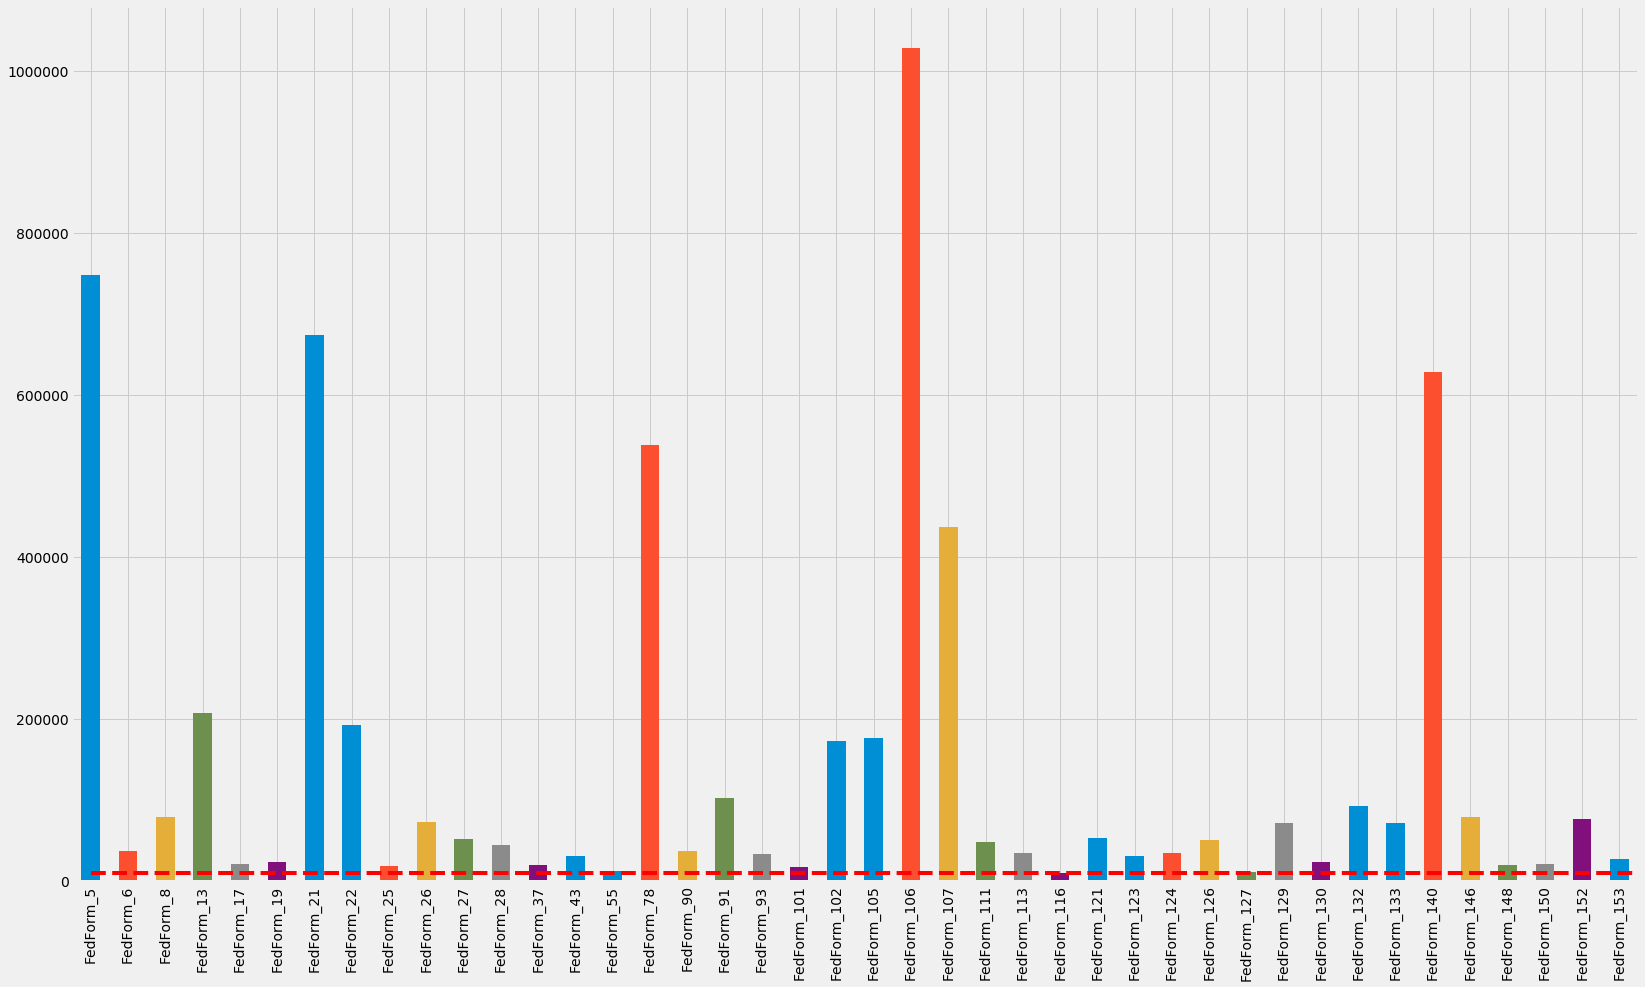

In [50]:
formsdataplot = formsdata.drop(['Funded'], axis=1)
ax = np.sum(formsdataplot).plot(kind='bar', figsize = (25,15))
ax = plt.plot([0, 42], [10000,10000], 'r--')

In [ ]:
ax = data.loc[:, 'AGI'].plot(kind='box');

Seeing large outliers in AGI

In [ ]:
ax = data.loc[:, 'AGI'].plot(kind='hist', bins=50, range=[0,100000]);
plt.xlabel('Adjusted Gross Income') 
plt.ylabel('Count of Returns') 
plt.title('Return Count by Adjusted Gross Income') 

Text(0.5,1,'Return Count by Expected Federal Refund')

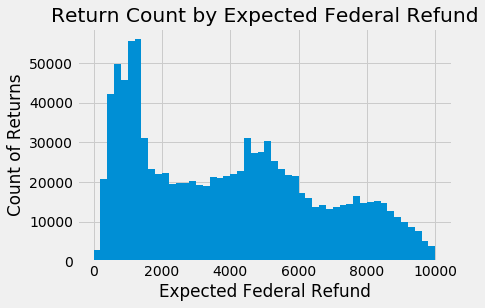

In [35]:
ax = data.loc[:, 'FederalRefund'].plot(kind='hist', bins=50, range=[0,10000]);
plt.xlabel('Expected Federal Refund') 
plt.ylabel('Count of Returns') 
plt.title('Return Count by Expected Federal Refund') 

#    
#    
# Takeaways

While the model was able to beat the null model, the improvement was pretty small (92.9% versus 92.15%).   
I was glad to see that prediction accuracy maximized at only 5 branches, as additional branches would get too complicated and cumbersome.   
It was interesting to see that dependent count had so little impact on funding likelihood, since this was actually explained  by Federal refund (and dependents correlated with Federal refund).   

Form presence has very little explanatory power over funding likelihood, however I think knowing the items and amounts entered onto the actual forms would provide more accurate results.
